# Caso COVID-19 Fase 1
### Gestión de Datos, Maestría en Ciencia de Datos
### Pontificia Universidad Javeriana Cali
### Por: Juan José Restrepo Rosero

# Contexto
---
El SARS-COV-2, responsable de la enfermedad COVID-19, es un virus de la
familia de los coronavirus que apareció en China a finales del año 2019 y se
expandió a gran velocidad a lo largo y ancho del globo, sorprendiendo a la
mayoría de países del planeta y causando una pandemia a inicios de 2020. La
gran preocupación con respecto a este virus es su alto índice de contagio, lo
que le permitió tal expansión en un período muy corto de tiempo; y su alto
grado de afectación en pacientes con comorbilidades previas, al punto de
ocasionar la muerte rápidamente.

# Caso
---
Consciente del peligro latente que representa el nuevo coronavirus, las
principales instituciones se han tomado seriamente la tarea de recopilar la
mayor cantidad de datos posibles sobre casos confirmados, decesos y
pacientes recuperados y almacenarlos en bases de datos. Lo anterior con el
fin de ver la evolución de la enfermedad, entender su comportamiento y, así,
tratar de crear mecanismos de contención. Ahora bien, las instituciones
desean proveer estos datos a todo el público, por lo que piensan que la mejor
manera de mostrarlos es por medio de gráficas, de forma que sea fácil de
entender tanto por expertos como por personas del común. Para ello contratan
a un equipo de ingenieros y científicos de datos cuya misión es realizar todo
el proceso de limpieza, preparación y visualización de datos, específicamente
de aquellos relacionados a casos confirmados de contagio.

# Alcance
---
Como ya se explicó, este es un caso de tipo programado, por lo que su
resolución se hará siguiendo una serie de pasos o fases. Para esta unidad,
deben desarrollar la Fase #1 que consiste en utilizar la base de datos de la
Universidad Johns Hopkins y el módulo de preparación y limpieza de datos
pandas de forma que puedan responder a las siguientes preguntas de
interés.
 1. ¿En cuál mes se presentó el mayor número de contagios?
 2. ¿En ese mismo mes, cuál fue el país que reportó más contagios?
 3. ¿Cuál es el país con el menor número de casos reportados hasta la fecha?


# Recursos
---
El dataset utilizado para este caso es el de la Universidad Johns Hopkins, el cual puede ser encontrado en el siguiente enlace:

[Time Series Covid 19 Confirmed Global](https://raw.githubusercontent.com/CSSEGISandData/COVID19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)

# Consideraciones 
---
Es importante leer las condiciones de uso para trabajar con el dataset de la Universidad Johns Hopkins. Dichas condiciones las pueden encontrar en el siguiente enlace:

[CSSEGISandData](https://github.com/CSSEGISandData/COVID-19)

Importamos las librerias a emplear en nuestro análisis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importamos nuestro dataset

In [3]:
covid_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid_muertes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covid_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## 1. Conociendo nuestro dataset

Visualizamos los datos

### **Casos confirmados**

In [4]:
covid_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
covid_confirmados.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,263921,264127,264127,264127,264127,264127,264127,264127,264276,264276


In [8]:
covid_confirmados.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

1. En primer lugar nuestro dataset contiene los datos de contagios por COVID-19, el cual contiene entradas por fecha de 188 países, especificando su latitud, longitud, tipo de casos y el número de casos registrados ese día. Las columnas que contiene este dataset son las siguientes:
- **'Province/State' y 'Country/Region':** muestran la provincia o país correspondiente para cada fila.
- **'Lat' y 'Long':** muestran la latitud y longitud geográfica para cada ubicación.
- **Las columnas de fechas**: registran los casos confirmados acumulativos día a día.

Dado que las columnas están correctamente nombradas, no será necesario utilizar el el parámetro **header=None** en el método de pandas *read_csv()*

No obstante, podemos denotar la presencia de valores NaN en la columna *Province/State*, lo que indica que no todas las ubicaciones están desglosadas por provincia, es decirt, para los países que no desglosan los datos a nivel de provincia (como aquellos que reportan solo a nivel nacional), la columna muestra NaN. Por ejemplo, Afganistán y Albania no tienen provincias listadas, ya que probablemente solo reportan casos a nivel nacional.

In [11]:
print("Shape Confirmados: ", covid_confirmados.shape)
covid_confirmados.info()

Shape Confirmados:  (289, 1147)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


Lo anterior, nos muestra que el dataset cuenta con:
- 289 registros (filas) y 1147 columnas para casos confirmados, en donde cada fila representa una ubicación geográfica única (país o provincia) y cada columna adicional es un punto temporal específico (fecha) que almacena los casos confirmados acumulados en esa fecha.
- Las filas están enumeradas de 0 a 288.
- Las columnas ‘Lat’ y ‘Long’ están en formato float64 (números decimales).
- La mayoría de las columnas de fechas tienen valores de tipo int64, ya que almacenan el conteo acumulado de casos (enteros).
- Las columnas de país y provincia están en formato object, ya que contienen texto.


In [12]:
# Usamos el método descibre para obtener datos estadísticos de las columnas de tipo numérico.
covid_confirmados.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,287.0,1.971872e+01,2.595661e+01,-71.9499,4.072192,21.512583,4.040178e+01,7.170690e+01
Long,287.0,2.218208e+01,7.787093e+01,-178.1165,-32.823050,20.939400,8.922435e+01,1.780650e+02
1/22/20,289.0,1.927336e+00,2.617366e+01,0.0000,0.000000,0.000000,0.000000e+00,4.440000e+02
1/23/20,289.0,2.273356e+00,2.627019e+01,0.0000,0.000000,0.000000,0.000000e+00,4.440000e+02
1/24/20,289.0,3.266436e+00,3.270727e+01,0.0000,0.000000,0.000000,0.000000e+00,5.490000e+02
...,...,...,...,...,...,...,...,...
3/5/23,289.0,2.339187e+06,8.518645e+06,0.0000,14567.000000,103248.000000,1.052664e+06,1.036470e+08
3/6/23,289.0,2.339387e+06,8.519346e+06,0.0000,14567.000000,103248.000000,1.052664e+06,1.036555e+08
3/7/23,289.0,2.339839e+06,8.521641e+06,0.0000,14567.000000,103248.000000,1.052926e+06,1.036909e+08
3/8/23,289.0,2.340460e+06,8.524968e+06,0.0000,14567.000000,103248.000000,1.053068e+06,1.037558e+08


Analizar esta salida de describe() nos permite tener una idea inicial de la distribución de los valores en cada columna numérica y detectar posibles valores atípicos. Aquí un análisis más detallado:

#### **1. Columnas de Latitud (Lat) y Longitud (Long)**
**Promedio y Desviación Estándar:**
- Lat: Promedio de 19.72, desviación estándar de 25.96.
- Long: Promedio de 22.18, desviación estándar de 77.87.

**Rango de Valores:**
- Latitudes: Desde -71.95 hasta 71.71.
- Longitudes: Desde -178.12 hasta 178.06.

Estos valores son consistentes con coordenadas geográficas, pero su gran rango y desviación estándar podrían indicar valores atípicos en ubicaciones extremas (como países cerca de los polos o posiciones de longitud muy negativas o positivas).

#### **2. Columnas de Fechas**
Cada una de estas columnas representa la cantidad de casos confirmados para una fecha específica y muestra las siguientes estadísticas:

**Promedios Altos y Rango de Valores Extremos:** 
- Los valores promedio incrementan conforme se avanza en las fechas, alcanzando millones en las últimas fechas (3/5/23 a 3/9/23), lo que es consistente con el aumento acumulativo de casos de COVID-19 en el tiempo.
- La desviación estándar también es considerable, lo que sugiere una amplia variabilidad entre países.

**Percentiles e Incremento en la Mediana:**
- El incremento en el 50% (mediana) y el 75% en los últimos días indica que la mayoría de los países muestran un acumulado de casos, con un incremento continuo y gradual en los casos confirmados.


#### **3. Detección de Valores Atípicos**
Para confirmar la existencia de valores atípicos:

**Valores Mínimos y Máximos:**
Los valores de max en las últimas fechas (3/9/23) superan los 100 millones, lo que sugiere que algunos países han reportado altos acumulados de casos, en contraste con la mayoría.
En fechas tempranas como 1/22/20 a 1/24/20, el valor máximo de casos era alrededor de 400-500, lo que indica que muy pocos lugares tenían casos reportados en esos días.

**Desviación Estándar:**
La alta desviación estándar en fechas tardías confirma una gran disparidad entre países, algunos de los cuales tienen valores extremadamente altos de casos (como Estados Unidos o India), mientras que otros muestran pocos casos.



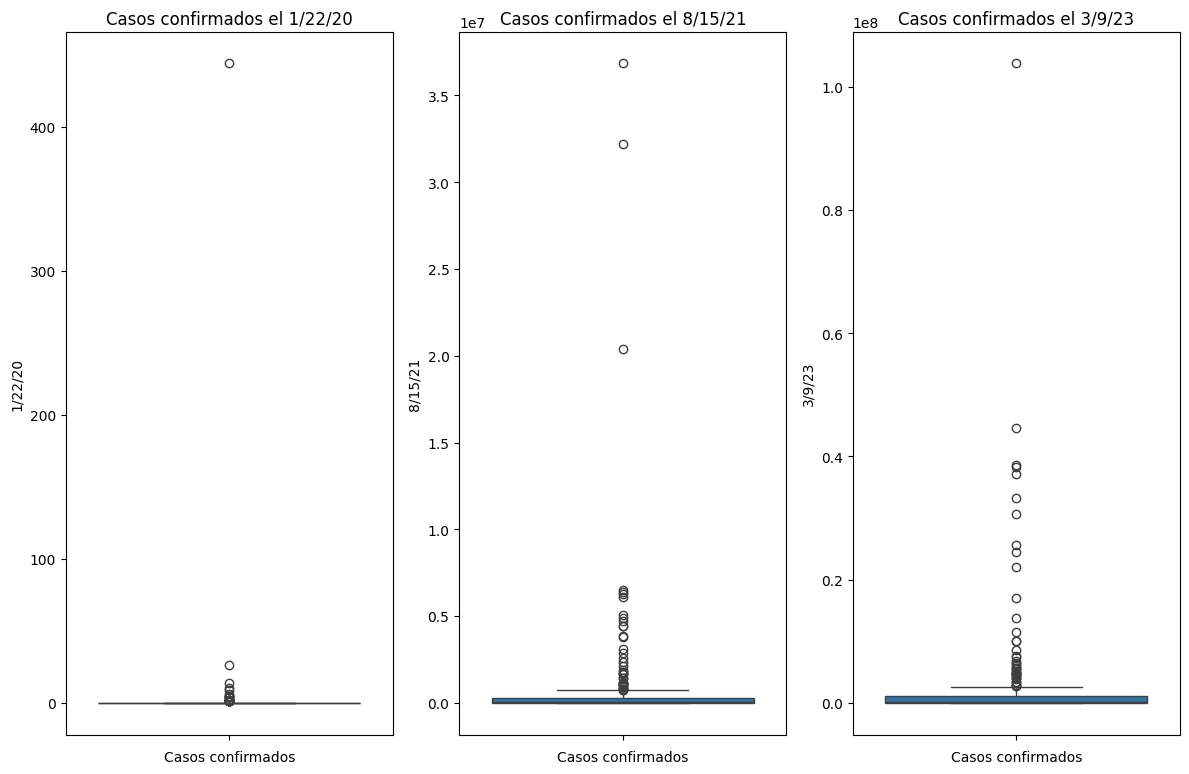

In [16]:
# Filtramos los datos para mostrar solo los últimos días
dates_columns = covid_confirmados.columns[4:]  # Columnas de fechas (omitimos las primeras columnas no numéricas)

# Escogemos algunas fechas representativas (al inicio, medio y fin de la pandemia)
selected_dates = [dates_columns[0], dates_columns[int(len(dates_columns)/2)], dates_columns[-1]]

# Graficamos los valores de estas fechas en boxplots para visualizar posibles outliers
plt.figure(figsize=(12, 8))
for i, date in enumerate(selected_dates, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=covid_confirmados[date])
    plt.title(f"Casos confirmados el {date}")
    plt.xlabel("Casos confirmados")
plt.tight_layout()
plt.show()

En los gráficos de caja que has generado para las fechas seleccionadas, se pueden observar valores atípicos bastante claros. Algunos puntos clave de análisis serían:

- **Fecha Inicial (1/22/20):** Hay algunos puntos de casos confirmados que son significativamente mayores que la mayoría de los datos (con casos superiores a 400 en el primer gráfico). Esto indica que desde el inicio de la pandemia ya existían zonas o países con un número notablemente alto de casos confirmados, en comparación con la mayoría de los registros.

- **Fecha Intermedia (8/15/21):** Aquí los valores atípicos son mucho más altos, en el rango de decenas de millones, y hay un mayor número de outliers. Esto es esperable ya que a medida que avanzó la pandemia, algunos países tuvieron brotes significativos. La dispersión en esta fecha refleja la acumulación de casos en algunos países que se vieron más afectados.

- **Fecha Final (3/9/23):** En el último gráfico, vemos valores atípicos incluso mayores, algunos alcanzando cientos de millones de casos acumulados. Esto refleja el efecto de acumulación de casos confirmados a lo largo del tiempo, especialmente en países con altas densidades de población.

De lo anterior podemos inferir lo siguiente:

- **Presencia de valores atípicos:** Los outliers son consistentes a lo largo del tiempo, lo cual es común en este tipo de datos ya que algunos países (con grandes poblaciones o con brotes significativos) reportan muchos más casos que otros.
- **Incremento de valores extremos:** A medida que la pandemia avanza, el rango de los valores extremos aumenta, lo que sugiere acumulación de casos en regiones con alta exposición o grandes poblaciones.

In [17]:
# Fechas de interés
fechas = ['1/22/20', '8/15/21', '3/9/23']

# Crear un diccionario para almacenar los países y casos por fecha
outliers_por_fecha = {}

for fecha in fechas:
    # Calcular el percentil 95 para esta fecha
    percentil_95 = covid_confirmados[fecha].quantile(0.95)
    
    # Filtrar los países con valores superiores al percentil 95
    outliers = covid_confirmados[covid_confirmados[fecha] > percentil_95][['Country/Region', 'Province/State', fecha]]
    
    # Almacenar los resultados en el diccionario
    outliers_por_fecha[fecha] = outliers

# Mostrar resultados
for fecha, outliers in outliers_por_fecha.items():
    print(f"\nPaíses con casos confirmados en el percentil 95 o superior en la fecha {fecha}:")
    print(outliers)


Países con casos confirmados en el percentil 95 o superior en la fecha 1/22/20:
    Country/Region Province/State  1/22/20
60           China        Beijing       14
61           China      Chongqing        6
64           China      Guangdong       26
67           China         Hainan        4
70           China          Henan        5
72           China          Hubei      444
73           China          Hunan        4
84           China       Shanghai        9
86           China        Sichuan        5
87           China        Tianjin        4
92           China       Zhejiang       10
252       Thailand            NaN        4

Países con casos confirmados en el percentil 95 o superior en la fecha 8/15/21:
     Country/Region Province/State   8/15/21
7         Argentina            NaN   5084635
31           Brazil            NaN  20368358
93         Colombia            NaN   4867761
131          France            NaN   6360422
135         Germany            NaN   3810641
148      

### **Casos muertes**

### **Casos recuperados**

Al verificar esta información podemos comenzar a detectar los primeros problemas. 

Anteriormente habíamos dicho que el número total de registros era de 289, pero aquí vemos que para algunas columnas los registros no están completos. Por ejemplo, para el caso del dataset de pacientes con covid recuperados, donde faltan 15 registros, lo que nos quiere decir es que en cada una de esas columnas hay valores nulos.